# Choosing the right threshold value for classfication problem using ROC and AUC metrics
ROC(Receiver Operating Characteristic Curve) is a probability curve and AUC(Area under the ROC curve) represents degree or measure of separability

In [20]:
# Import the usual libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
# Creating a randomly generated dummy dataset 
from sklearn.datasets import make_classification
# Create X as dependent and Y as the independent variable 
# No of samples -> 5000
# No of independent variables -> 25
# No of output classes -> 2
# Ratio of each output class -> 1:1
x,y = make_classification(n_samples=5000,n_features=25,n_classes=2,weights=[1,1],random_state=0)

In [22]:
# Split the data into training set and test set
from sklearn.model_selection import train_test_split

# ratio of training to test dataset obersavations -> 7:3
xtrain, xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=101)

In [54]:
# Import the relevant roc and auc library
from sklearn.metrics import roc_curve,roc_auc_score

# Create an empty list that will store the probabilities of each of the classification models
pred_final =[]

In [55]:
# Creating a classification model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#Fit the model using training data
rfc.fit(xtrain,ytrain)

#Predict probability of each class on the test data
predRFC = rfc.predict_proba(xtest)

#Check the ROC score of predicting class 1
print('Random Forest Classifier',roc_auc_score(ytest,predRFC[:,1]))

#Append the predicted probabilities as a Series to the pred_final list
pred_final.append(pd.Series(predRFC[:,1]))

Random Forest Classifier 0.9947145820999802


In [56]:
# Creating a classification model using Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

# Fit the model using training data
lg.fit(xtrain,ytrain)

# Predict probability of each class for the test data
predLG =lg.predict_proba(xtest)

#Check the ROC score of predicting class 1
print('Logistic Regression',roc_auc_score(ytest,predLG[:,1]))

#Append the predicted probabilities as a Series to the pred_final list
pred_final.append(pd.Series(predLG[:,1]))

Logistic Regression 0.9956817086851167


In [27]:
# Creating a classification model using Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

# Fit the model using the training data
adb.fit(xtrain,ytrain)

#Predict the probability of each class for test data
predADB =adb.predict_proba(xtest)

# Check the ROC score of predicting class 1
print('Adaboost Classifier',roc_auc_score(ytest,predADB[:,1]))

#Append the predicted probabilities as a Series to the pred_final list
pred_final.append(pd.Series(predADB[:,1]))

Adaboost Classifier 0.9948159170546729


In [57]:
# Creating a classification model using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Fit the model using training data
knn.fit(xtrain,ytrain)

# Predict the probability of each class for test data
predKNN = knn.predict_proba(xtest)

# Check the ROC score for predicting class 1
print('KNN Classifier',roc_auc_score(ytest,predKNN[:,1]))

#Append the predicted probabilities as a Series to the pred_final list
pred_final.append(pd.Series(predKNN[:,1]))

KNN Classifier 0.9943216869247686


In [58]:
# Concatanate each of the model's probabilities for class 1 as separate columns in the data frame
pred_final = pd.concat(pred_final,axis=1)

In [59]:
# Create a single list of probabilties by taking mean of each of the 4 probabilities
prob_final = pred_final.mean(axis=1)

In [60]:
# Find False Positive Rate, True Negative Rate and the corresponding threshold using Roc curve 
# by passing the actual and predicted O/Ps
fpr, tpr,threshold = roc_curve(ytest,prob_final)

# Note that length of thresholds is not the same as the test set count
threshold

array([1.99996458e+00, 9.99964577e-01, 9.99252738e-01, 9.99243727e-01,
       9.87616279e-01, 9.87234381e-01, 9.32602673e-01, 9.32595481e-01,
       8.33930741e-01, 8.19507041e-01, 7.42300376e-01, 5.81164618e-01,
       5.53707873e-01, 1.68926108e-01, 1.66968091e-01, 7.16202000e-02,
       7.16115603e-02, 1.65513454e-03, 1.63856994e-03, 3.86590989e-06,
       3.53026419e-06, 8.73993444e-08])

In [61]:
# Find accuracy of the prediction for each of the threshold
from sklearn.metrics import accuracy_score

# Creating a list that will hold the accuracy score of each threshold
acc_list=[]
for thres in threshold:
    # Classifying each probability as 0 or 1 based on the threshold
    f_pred = np.where(prob_final>thres,1,0)
    # Finding the accuracy score of the classification and append it to the acc_list
    acc_list.append(accuracy_score(ytest,f_pred,normalize=True))
    
# Append the threshold value along with the accuracy score for each threshold
acc_list= pd.concat([pd.Series(threshold),pd.Series(acc_list)],axis=1)
acc_list.columns =['threshold','accuracy']

In [62]:
# Sorting the dataframe by accuracy value in descending order to get the best threshold value and use head to get top 5
acc_list = acc_list.sort_values(by='accuracy',ascending=False).head()
acc_list

,threshold,accuracy
10,0.742300,0.993333
9,0.819507,0.992667
8,0.833931,0.992000
11,0.581165,0.992000
12,0.553708,0.991333


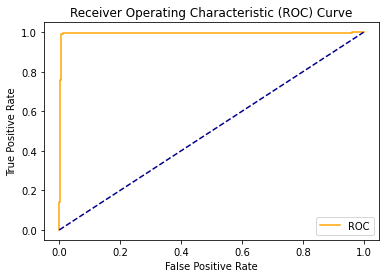

In [63]:
# Plotting the curve of TPR vs FPR to check Area under the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)
# AUC(blue dotted) and ROC(yellow) signifies that it has a high accuracy in distinguishing the data into correct classes, its alomst 99-100%  